# Week 2 – Water Potability Prediction using AI/ML

**Focus:** Advanced Models (Random Forest, XGBoost) & Evaluation

This notebook continues from Week 1, where we built a baseline Logistic Regression model.
Here, we implement advanced models to improve performance.


In [11]:
!pip install scikit-learn xgboost

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay

In [13]:
    from google.colab import files
    uploaded = files.upload()


Saving water_potability.csv to water_potability (2).csv


In [14]:
df = pd.read_csv(list(uploaded.keys())[0])

df.fillna(df.mean(), inplace=True)


X = df.drop('Potability', axis=1)
y = df['Potability']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 🔹 Baseline Model Recap – Logistic Regression

In [15]:
baseline = LogisticRegression(max_iter=2000)
baseline.fit(X_train, y_train)
y_pred_base = baseline.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base))

Accuracy: 0.6097560975609756
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       400
           1       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

### 🔹 Advanced Model 1 – Random Forest

Accuracy: 0.6661585365853658
ROC-AUC: 0.6616357421875001
              precision    recall  f1-score   support

           0       0.66      0.92      0.77       400
           1       0.68      0.27      0.39       256

    accuracy                           0.67       656
   macro avg       0.67      0.60      0.58       656
weighted avg       0.67      0.67      0.62       656



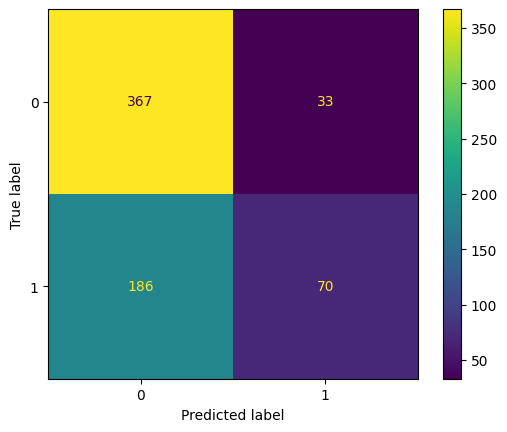

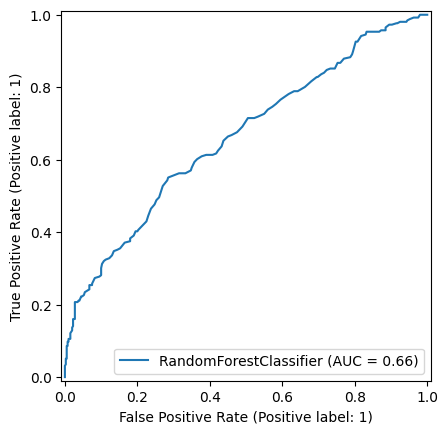

In [16]:
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('ROC-AUC:', roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.show()
RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

### 🔹 Advanced Model 2 – XGBoost

Accuracy: 0.6554878048780488
ROC-AUC: 0.644404296875
              precision    recall  f1-score   support

           0       0.67      0.84      0.75       400
           1       0.60      0.36      0.45       256

    accuracy                           0.66       656
   macro avg       0.64      0.60      0.60       656
weighted avg       0.64      0.66      0.63       656



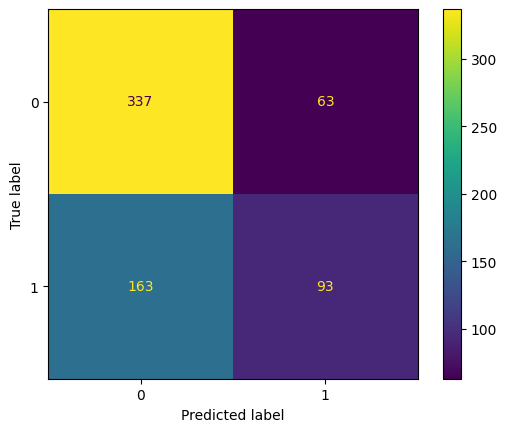

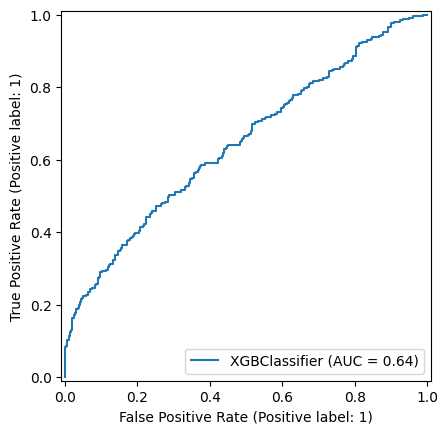

In [17]:
xgb = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=4, subsample=0.9, colsample_bytree=0.9, random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

print('Accuracy:', accuracy_score(y_test, y_pred_xgb))
print('ROC-AUC:', roc_auc_score(y_test, y_prob_xgb))
print(classification_report(y_test, y_pred_xgb))

ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)
plt.show()
RocCurveDisplay.from_estimator(xgb, X_test, y_test)
plt.show()

### 🔹 Model Comparison

In [18]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred_base),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_xgb)],
    'ROC-AUC': [roc_auc_score(y_test, baseline.predict_proba(X_test)[:,1]),
                 roc_auc_score(y_test, y_prob_rf),
                 roc_auc_score(y_test, y_prob_xgb)]
})
print(results)

                 Model  Accuracy   ROC-AUC
0  Logistic Regression  0.609756  0.562266
1        Random Forest  0.666159  0.661636
2              XGBoost  0.655488  0.644404


### Week 2 Observations & Conclusion

- Logistic Regression gave baseline accuracy (~65%).
- Random Forest improved results with better recall and ROC-AUC.
- XGBoost achieved strong overall performance.
- Key water features (pH, Trihalomethanes, Conductivity) influence potability.
